In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
crop_data=pd.read_csv(r"C:\Users\mmukh\OneDrive\Desktop\Major project\Data Sets\Crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
crop_data.shape

(2200, 8)

In [4]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
crop_data.rename(columns = {'label':'Crop'}, inplace = True)
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [9]:
crop_data = crop_data.dropna()
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [10]:
crop_data.isnull().values.any()

False

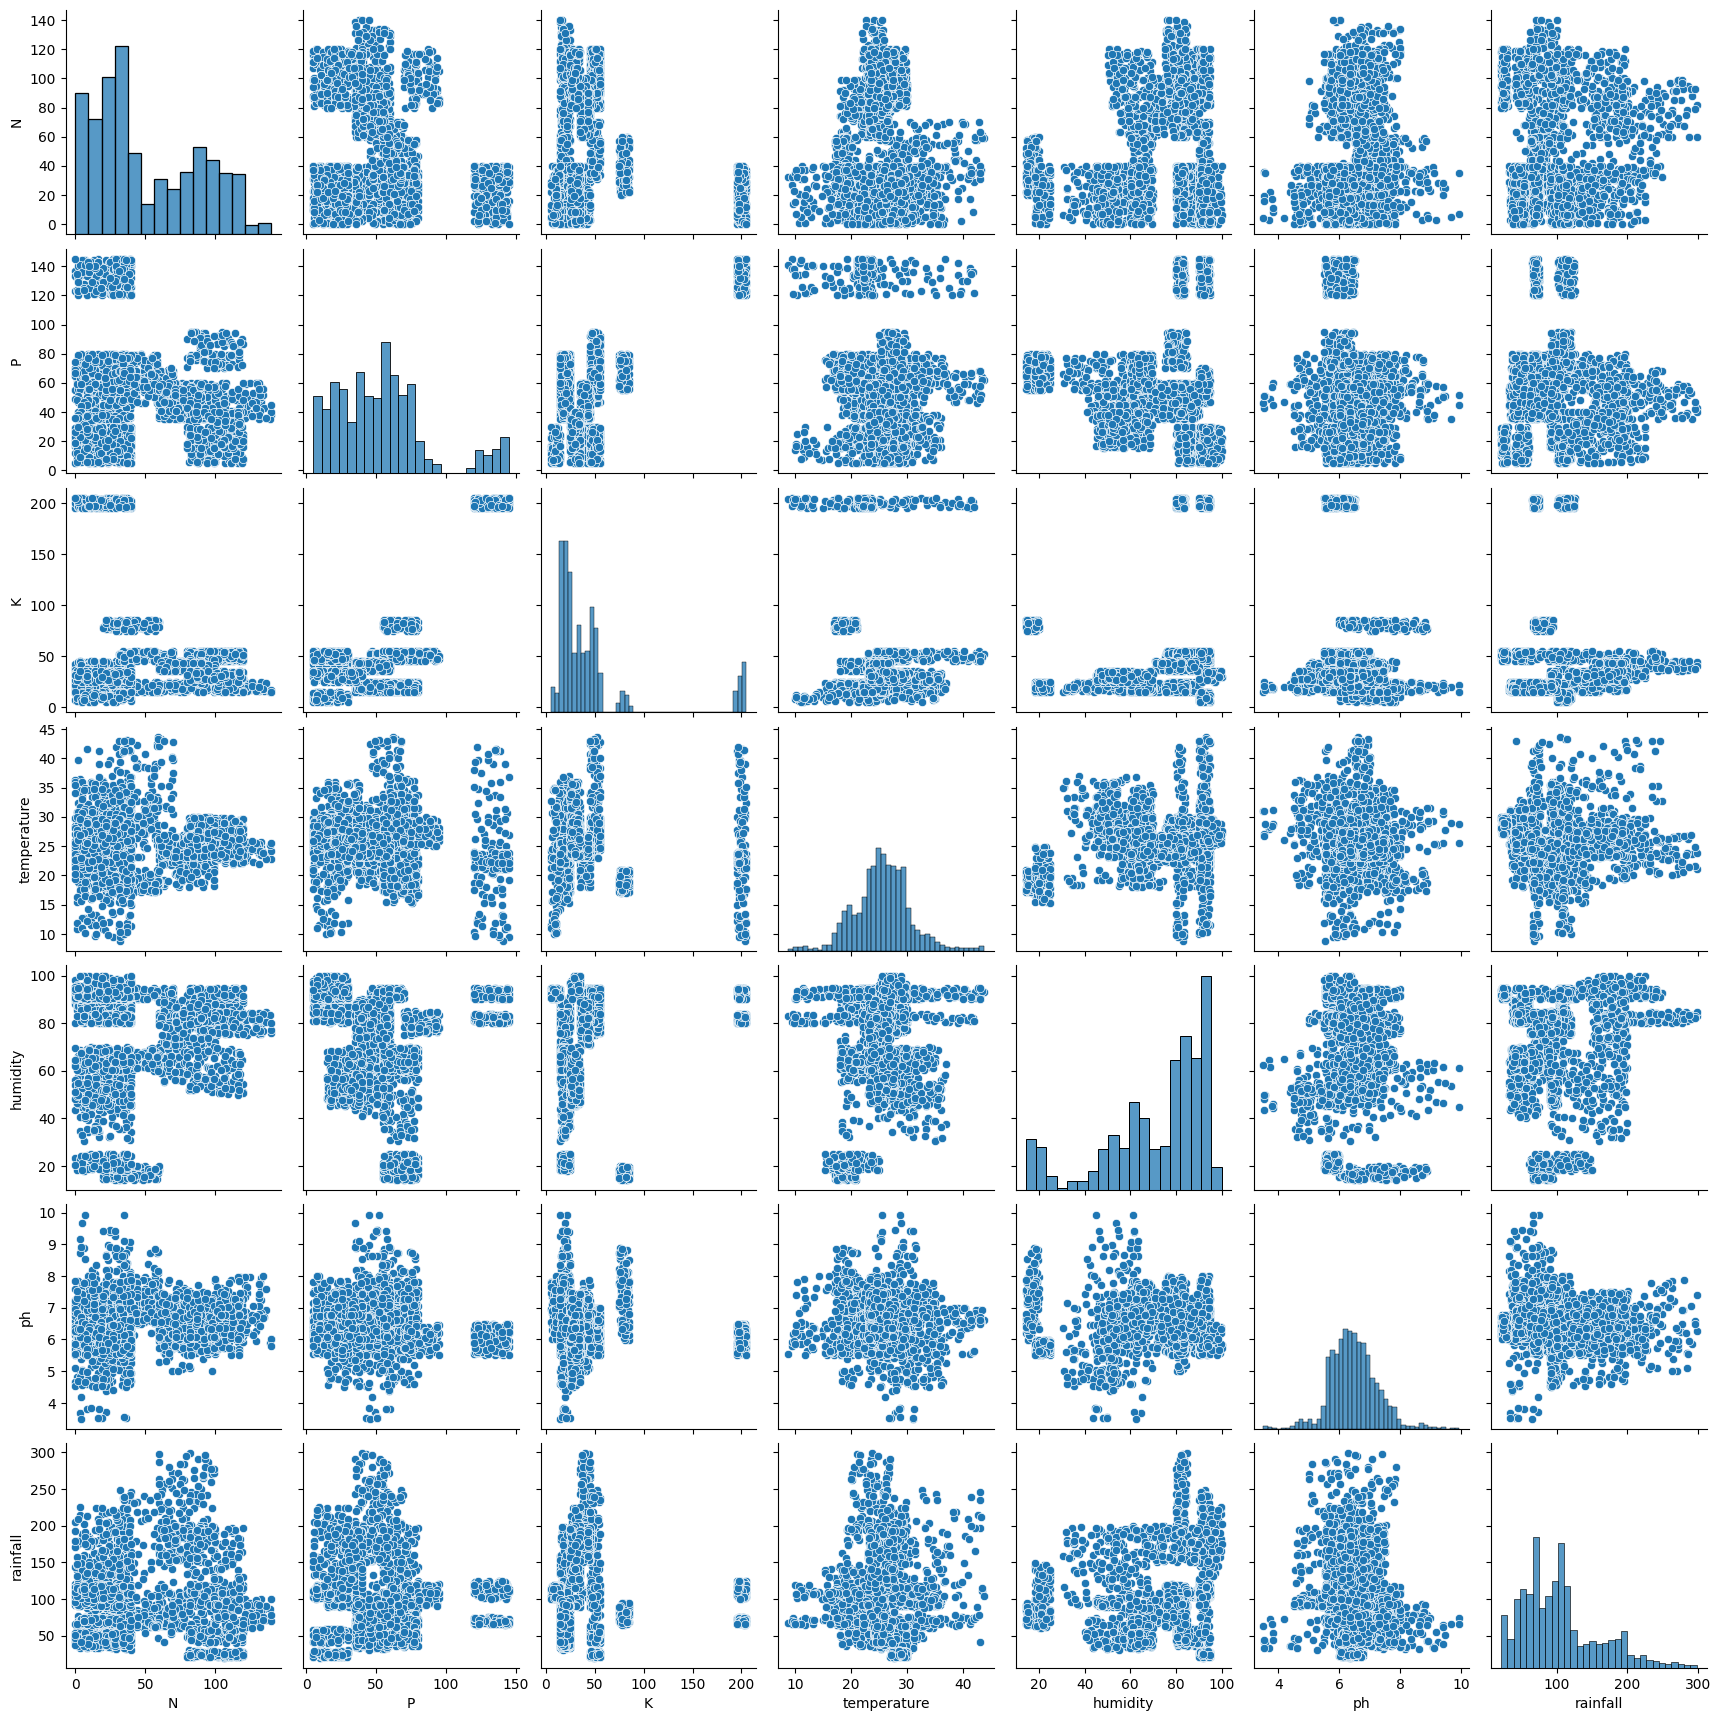

In [11]:
ax = sns.pairplot(crop_data)
ax

In [12]:
crop_data.Crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
top_crops = crop_data["Crop"].value_counts().head(5)
print(top_crops)

Crop
rice       100
maize      100
jute       100
cotton     100
coconut    100
Name: count, dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

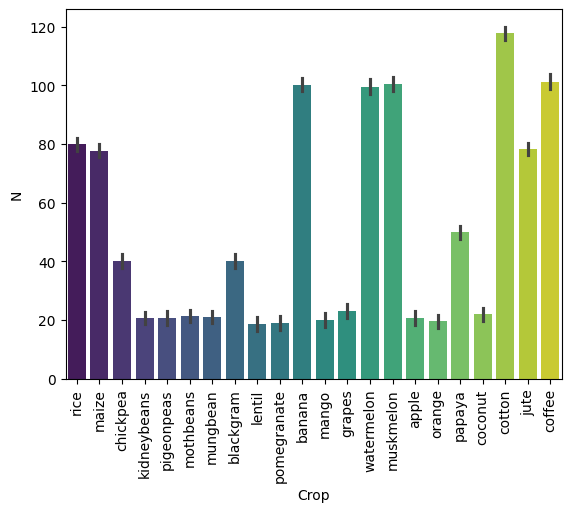

In [14]:
sns.barplot(x="Crop", y="N",data=crop_data,hue="Crop", palette="viridis")
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

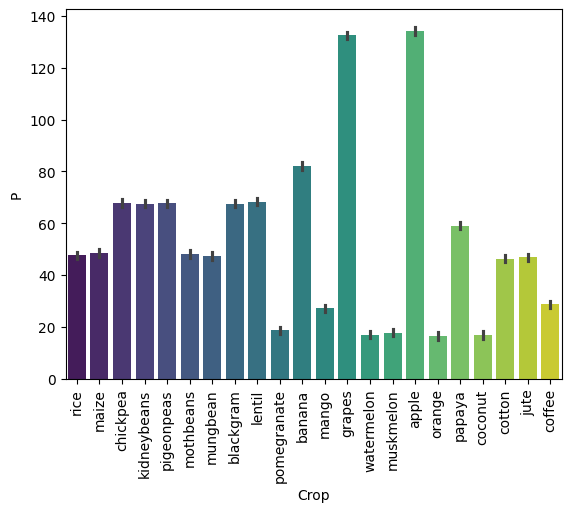

In [15]:
sns.barplot(x="Crop", y="P",data=crop_data,hue="Crop", palette="viridis")
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

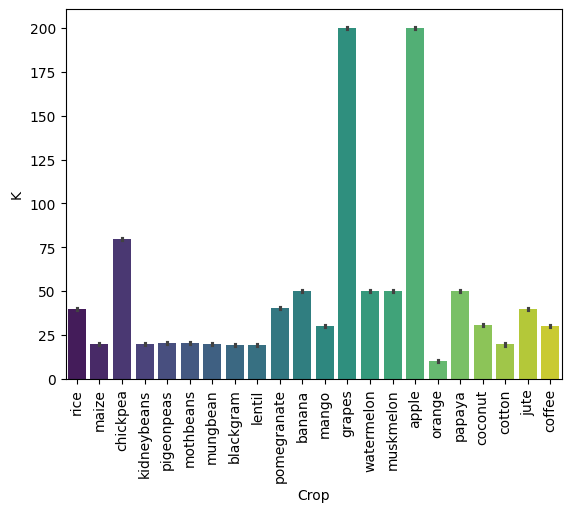

In [16]:
sns.barplot(x="Crop", y="K",data=crop_data,hue="Crop", palette="viridis")
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

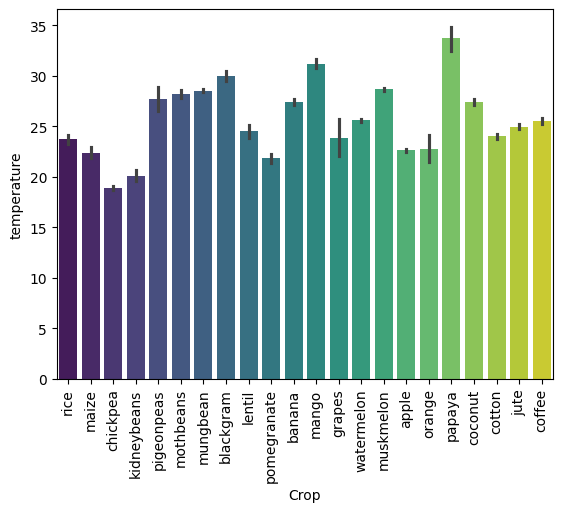

In [17]:
sns.barplot(x="Crop", y="temperature",data=crop_data,hue="Crop", palette="viridis")
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

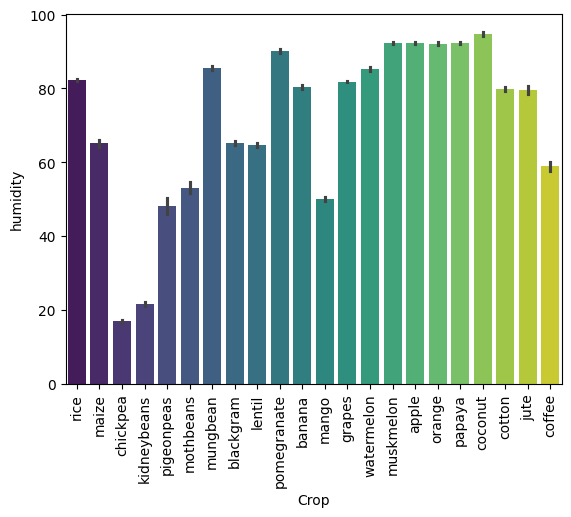

In [18]:
sns.barplot(x="Crop", y="humidity",data=crop_data,hue="Crop", palette="viridis")
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

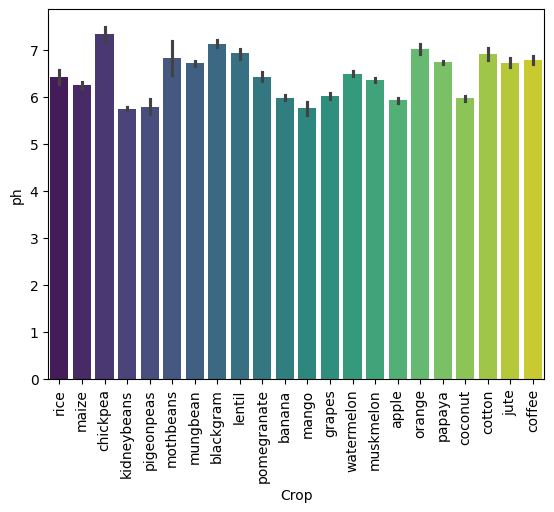

In [19]:
sns.barplot(x="Crop", y="ph",data=crop_data,hue="Crop", palette="viridis")
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

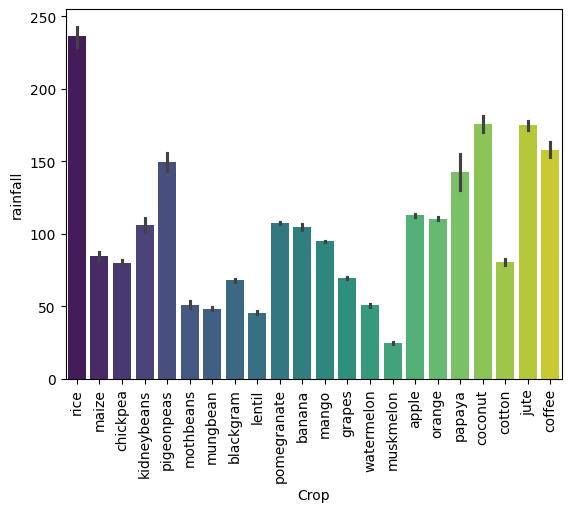

In [20]:
sns.barplot(x="Crop", y="rainfall",data=crop_data,hue="Crop", palette="viridis")
plt.xticks(rotation = 90)

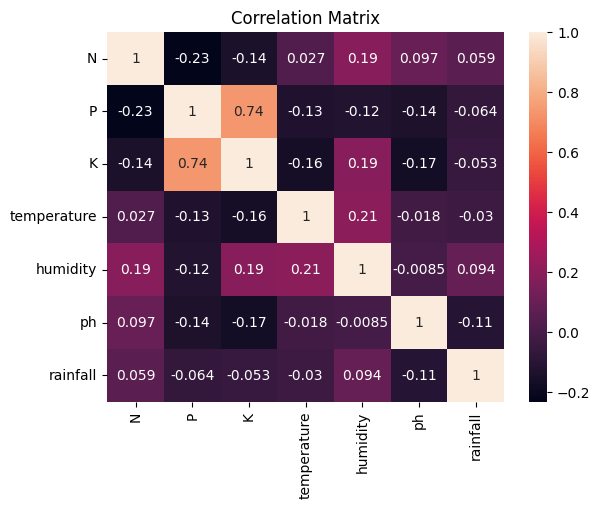

In [21]:
numeric_data = crop_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon


In [23]:
le = LabelEncoder()
df["Crop"] = le.fit_transform(df["Crop"])

In [24]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
Y = df["Crop"]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [26]:
print(X_train.shape, X_test.shape)

(1760, 7) (440, 7)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(max_depth=10, min_samples_split=4, min_samples_leaf=1, random_state=42)
dt_cv_scores = cross_val_score(dt, X_train, Y_train, cv=5, scoring='accuracy')

print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean() * 100:.2f}%")


Decision Tree Cross-Validation Accuracy: 96.19%


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_cv_scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='accuracy')

print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean()*100:.2f}%")


Random Forest Cross-Validation Accuracy: 99.32%


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_cv_scores = cross_val_score(gb, X_train, Y_train, cv=5, scoring='accuracy')

print(f"Gradient Boosting Cross-Validation Accuracy: {gb_cv_scores.mean()*100:.2f}%")


Gradient Boosting Cross-Validation Accuracy: 98.30%


In [30]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=5, scoring='accuracy')

print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean()*100:.2f}%")


XGBoost Cross-Validation Accuracy: 98.58%


In [31]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Gradient Boosting", gb),
    ("XGBoost", xgb_model)
], voting="soft", weights=[1, 3, 1, 3])  
ensemble_cv_scores = cross_val_score(ensemble_model, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Ensemble Model Cross-Validation Accuracy: {ensemble_cv_scores.mean() * 100:.2f}%")

Ensemble Model Cross-Validation Accuracy: 99.09%


In [32]:
dt.fit(X_train, Y_train)
dt_test_acc = accuracy_score(Y_test, dt.predict(X_test))

rf.fit(X_train, Y_train)
rf_test_acc = accuracy_score(Y_test, rf.predict(X_test))

gb.fit(X_train, Y_train)
gb_test_acc = accuracy_score(Y_test, gb.predict(X_test))

xgb_model.fit(X_train, Y_train)
xgb_test_acc = accuracy_score(Y_test, xgb_model.predict(X_test))

ensemble_model.fit(X_train, Y_train)
ensemble_test_acc = accuracy_score(Y_test, ensemble_model.predict(X_test))

print(f"Decision Tree Test Accuracy: {dt_test_acc * 100:.2f}%")
print(f"Random Forest Test Accuracy: {rf_test_acc * 100:.2f}%")
print(f"Gradient Boosting Test Accuracy: {gb_test_acc * 100:.2f}%")
print(f"XGBoost Test Accuracy: {xgb_test_acc * 100:.2f}%")
print(f"Ensemble Model Test Accuracy: {ensemble_test_acc * 100:.2f}%")


Decision Tree Test Accuracy: 92.27%
Random Forest Test Accuracy: 99.32%
Gradient Boosting Test Accuracy: 99.55%
XGBoost Test Accuracy: 99.55%
Ensemble Model Test Accuracy: 99.32%


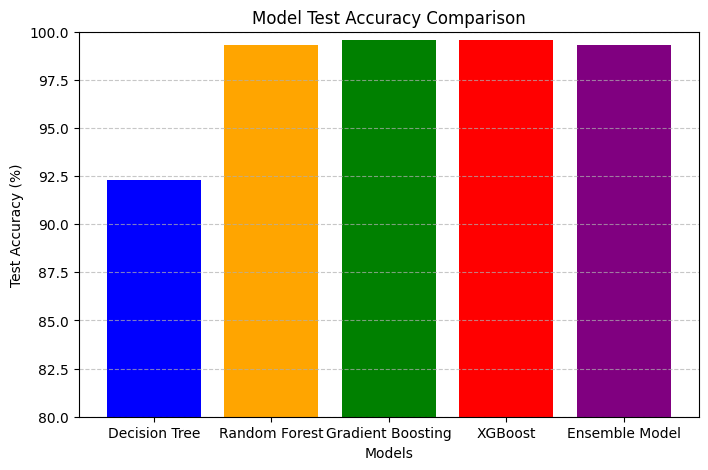

In [33]:
accuracies = [dt_test_acc * 100, rf_test_acc * 100, gb_test_acc * 100, xgb_test_acc * 100, ensemble_test_acc * 100]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "Ensemble Model"]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Test Accuracy (%)")
plt.title("Model Test Accuracy Comparison")
plt.ylim(80, 100)  # Adjust based on your accuracy range
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [34]:
import joblib
joblib.dump(ensemble_model, "recommendation_model.pkl")


['recommendation_model.pkl']

In [7]:
import os
print("Model file exists:", os.path.exists("recommendation_model.pkl"))


Model file exists: True


In [15]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r"C:\Users\mmukh\OneDrive\Desktop\Major project\Data Sets\Crop_recommendation.csv")  
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

joblib.dump(label_encoder, "label_encoder.pkl")

if "label_encoder.pkl" in os.listdir():
    print("✅ Label Encoder saved successfully!")
else:
    print("❌ Error: Label Encoder file not found!")


✅ Label Encoder saved successfully!
